# Machine learning (Regression) Exam question

## Problem Statement
In this task, you are provided with a dataset that includes several features, which includes the `Temperature`, `Humadity`, and `Soil_moisture`  used to predict the `Growth`. Your task is to clean, visualize and apply a machine learning model to accurately predict this outcome and evaluate the performance of your model. Don't forget Your targted column is the `Growth` column.

# Step 1: Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Read the dataset

In [4]:
df=pd.read_csv('/content/Crop_growth.csv')
df.head()

,Unnamed: 0,Temperature,Humidity,Soil_Moisture,Growth
0,0,19.363503,41.107976,17.851171,70.347851
1,1,33.767858,62.514057,17.409364,102.322386
2,2,28.299849,82.376750,37.187637,121.872884
3,3,24.966462,73.933493,17.486386,91.019964
4,4,13.900466,78.393669,18.158492,94.534460


# Step 3: Explore the Dataset

In [5]:
df.shape

(1003, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1003 non-null   int64  
 1   Temperature    994 non-null    float64
 2   Humidity       995 non-null    float64
 3   Soil_Moisture  1003 non-null   float64
 4   Growth         994 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 39.3 KB


# Step 4: Preprocess the dataset (if needed)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df=df.drop(columns=['Unnamed: 0'])

In [9]:
df['Growth'].fillna(df['Growth'].mean(),inplace=True)

In [10]:
df['Humidity'].fillna(df['Humidity'].mean(),inplace=True)

In [11]:
df['Soil_Moisture'].fillna(df['Soil_Moisture'].mean(),inplace=True)

In [12]:
df['Temperature'].fillna(df['Temperature'].mean(),inplace=True)

In [13]:
# we have outliers , we handle it
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()




df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


df.shape


(1000, 4)

In [14]:
# missing values
print(df.isnull().sum())

# statistics
print(df.describe())


Temperature      0
Humidity         0
Soil_Moisture    0
Growth           0
dtype: int64
       Temperature     Humidity  Soil_Moisture       Growth
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     22.277445    60.471110      25.106880    87.656914
std       7.218761    17.362197       8.668349    17.723327
min      10.115801    30.193096      10.000349    38.937510
25%      16.050113    45.081560      18.090794    74.907585
50%      22.314197    61.221958      25.118193    87.619057
75%      28.440004    75.305943      32.690443   100.927789
max      34.992942    89.964824      39.934626   136.309728


# Step 5: Visualize your Dataset

<Figure size 1000x600 with 0 Axes>

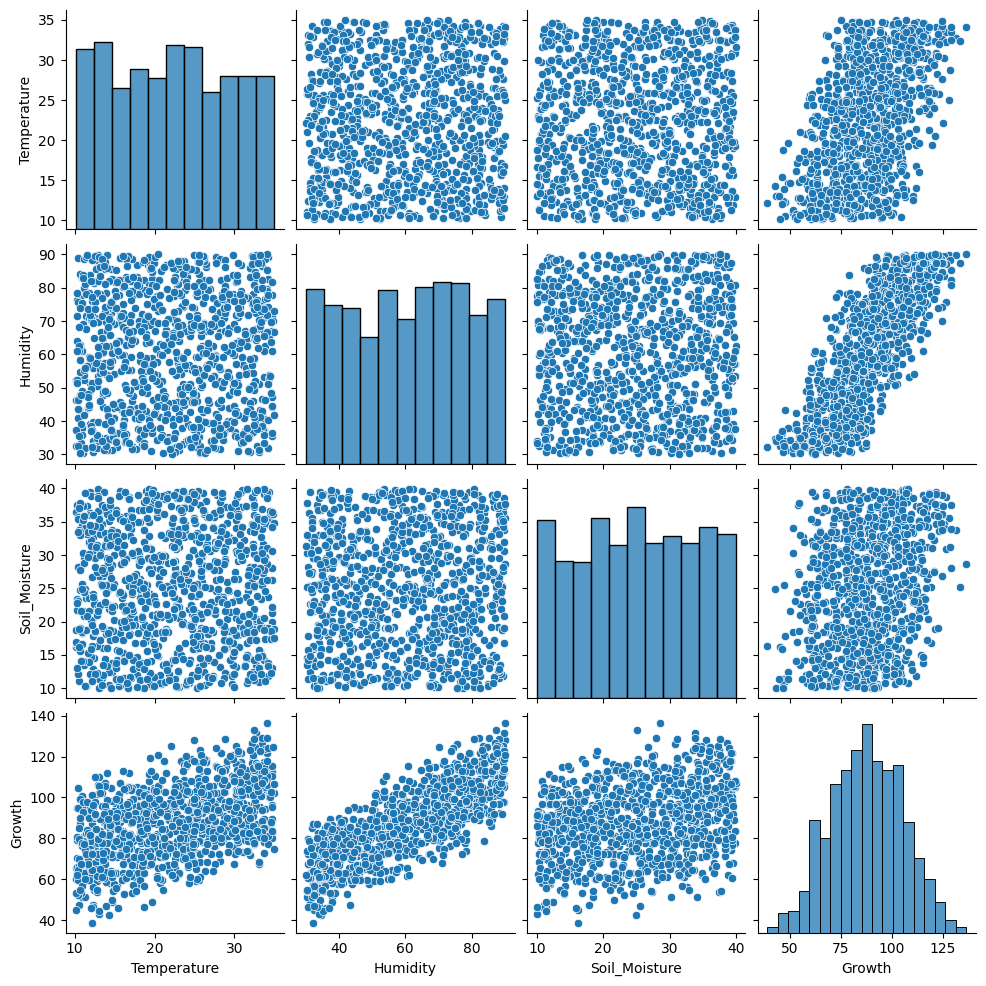

In [15]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, vars=['Temperature', 'Humidity', 'Soil_Moisture', 'Growth'])
plt.show()

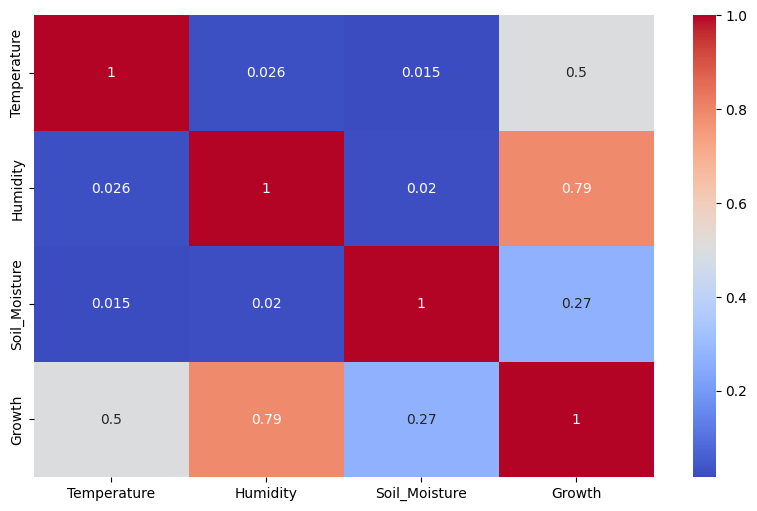

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Temperature', 'Humidity', 'Soil_Moisture', 'Growth']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 6: Train your model

In [29]:
# عرض أسماء الأعمدة في مجموعة البيانات
print(data.columns)

Index(['Unnamed: 0', 'Temperature', 'Humidity', 'Soil_Moisture', 'Growth'], dtype='object')


   Unnamed: 0  Temperature   Humidity  Soil_Moisture      Growth
0           0    19.363503  41.107976      17.851171   70.347851
1           1    33.767858  62.514057      17.409364  102.322386
2           2    28.299849  82.376750      37.187637  121.872884
3           3    24.966462  73.933493      17.486386   91.019964
4           4    13.900466  78.393669      18.158492   94.534460
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1003 non-null   int64  
 1   Temperature    994 non-null    float64
 2   Humidity       995 non-null    float64
 3   Soil_Moisture  1003 non-null   float64
 4   Growth         994 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 39.3 KB
None
        Unnamed: 0  Temperature     Humidity  Soil_Moisture      Growth
count  1003.000000   994.000000   995.000000    1003.000000  994.000

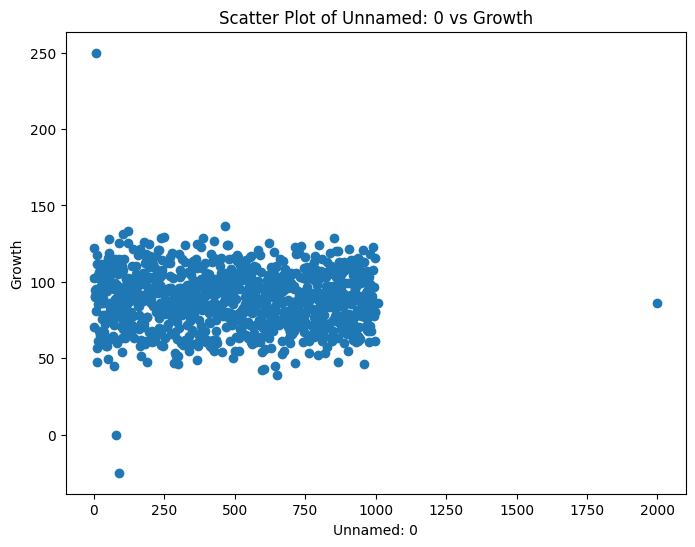

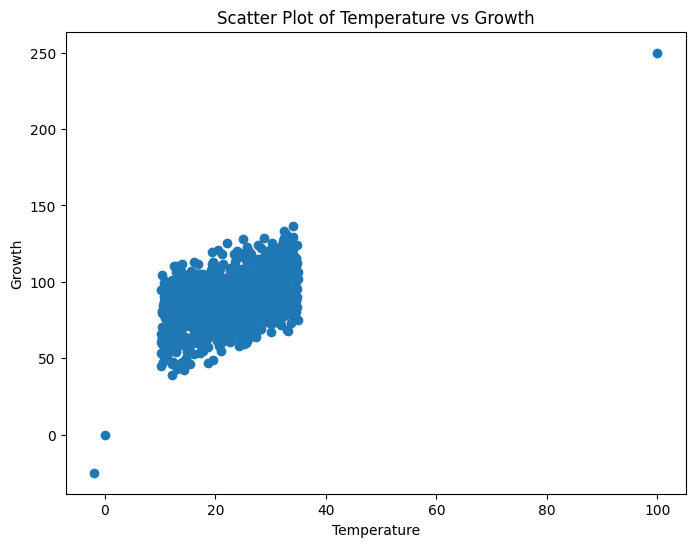

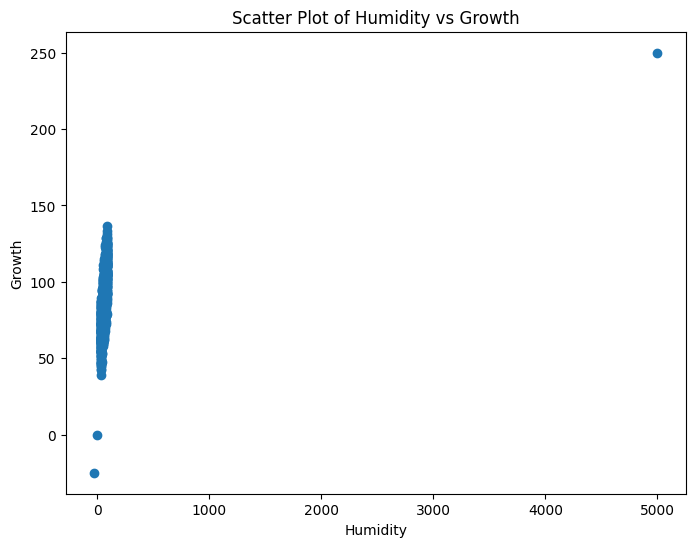

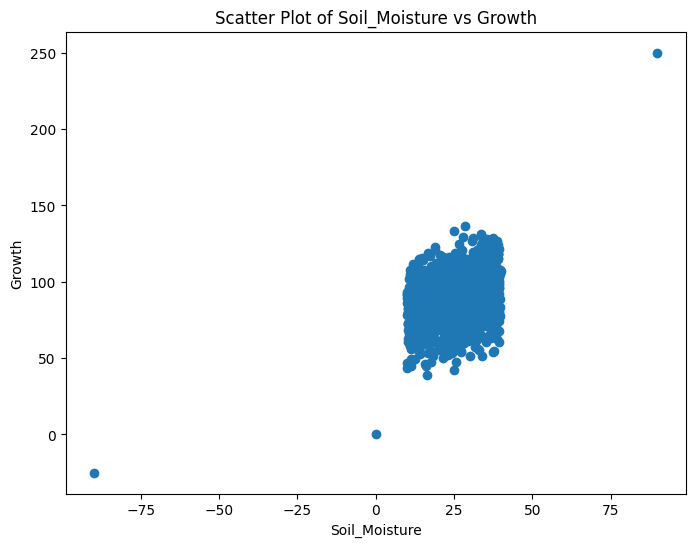

<Figure size 1000x800 with 0 Axes>

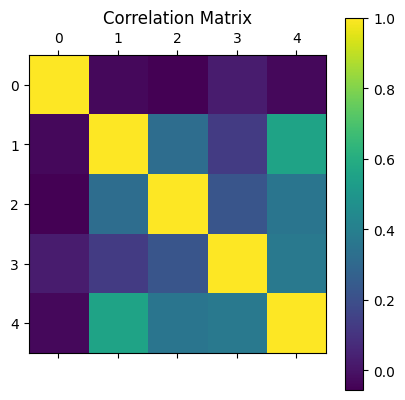

Mean Squared Error: 233.96
R-squared: 0.43


In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/Crop_growth.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Clean the data
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Visualize the data
# Scatter plot of 'Growth' vs. other features
for col in df.columns:
    if col != 'Growth':
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col], df['Growth'])
        plt.xlabel(col)
        plt.ylabel('Growth')
        plt.title(f'Scatter Plot of {col} vs Growth')
        plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(df.corr())
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

# Split the data into features and target
X = df.drop('Growth', axis=1)
y = df['Growth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# You can further tune the model, try other algorithms, or perform feature engineering to improve the model's performance.

# Step 7: Cross-validate and test your model

In [33]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Test the model on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'R^2 Score on Test Set: {r2}')


Cross-Validation Scores: [-191.27489118    0.36246164    0.33395549    0.32190201    0.30567707]
Mean CV Score: -37.99017899457415
Mean Squared Error on Test Set: 233.95518709087847
R^2 Score on Test Set: 0.43182124666812605
